In [22]:
#firstly we use KMeans to find clusters of customers in Data without labels.(unsupervised model)
#then we use that features and create y_train,obviously X_train to predict the label for new data(supervised classification model)
import numpy as np
import pandas as pd
df=pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


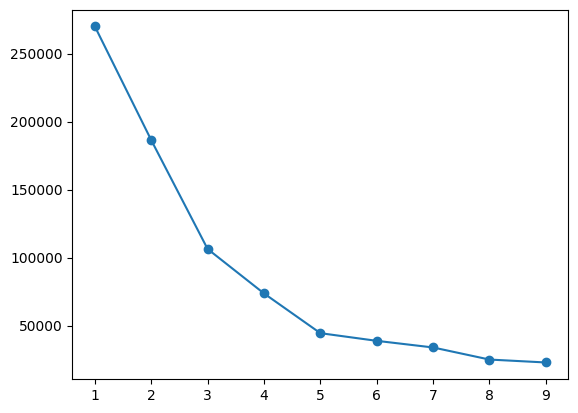

In [23]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
#To Find the no of clusters in the df we use elbow method because we have more no of features
X=df[['Annual Income (k$)','Spending Score (1-100)']]         #the independent features
cluster_range=range(1,10)
cluster_errors=[]
for i in cluster_range:
    cluster=KMeans(i)
    cluster.fit(X)
    cluster_errors.append(cluster.inertia_)
plt.plot(cluster_range,cluster_errors,marker='o')
plt.show()

In [24]:
#No of clusters are 5 .So Now fitting with independent features
kmeans=KMeans(5)
kmeans.fit(X)
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [26]:
#prredicting
y_means = kmeans.fit_predict(X)


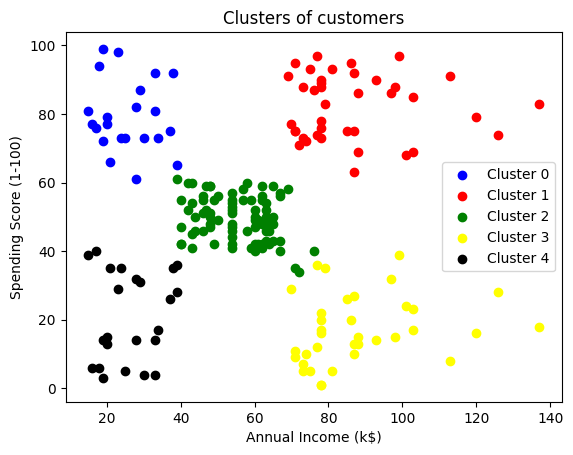

In [27]:
#plotting 
# Convert to NumPy array for indexing
X_array = X.values

plt.scatter(X_array[y_means == 0, 0], X_array[y_means == 0, 1], color='blue', label='Cluster 0')
plt.scatter(X_array[y_means == 1, 0], X_array[y_means == 1, 1], color='red', label='Cluster 1')
plt.scatter(X_array[y_means == 2, 0], X_array[y_means == 2, 1], color='green', label='Cluster 2')
plt.scatter(X_array[y_means == 3, 0], X_array[y_means == 3, 1], color='yellow', label='Cluster 3')
plt.scatter(X_array[y_means == 4, 0], X_array[y_means == 4, 1], color='black', label='Cluster 4')

plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()


In [28]:

df["Target"]=y_means
Clustered_df=df
Clustered_df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Target
0,1,Male,19,15,39,4
1,2,Male,21,15,81,0
2,3,Female,20,16,6,4
3,4,Female,23,16,77,0
4,5,Female,31,17,40,4


In [32]:
#finding x ,y
x=Clustered_df.iloc[:,1:5]
y=Clustered_df.iloc[:,-1]


In [33]:
x.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [34]:
y.head()


0    4
1    0
2    4
3    0
4    4
Name: Target, dtype: int32

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,StandardScaler      
#LabelEncoder- Used to convert Categorical variables into numerical values.
label=LabelEncoder()
x['Gender']=label.fit_transform(x['Gender'])
x.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


In [38]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)      #used for training data it fits using mean,std
x_test=scaler.transform(x_test)            #used for testing it does not fit , only transforms


In [39]:
from sklearn import metrics
from sklearn.ensemble import GradientBoostingClassifier
gbc=GradientBoostingClassifier(n_estimators=50,random_state=2)     #creates 50 decision trees
model=gbc.fit(x_train,y_train)
y_pred=model.predict(x_test)
accuracy=metrics.accuracy_score(y_test,y_pred)
print("Accuracy:",accuracy)

Accuracy: 0.95


In [41]:
predictions_df=pd.DataFrame({'Actual_values':y_test,'Predicted values':y_pred})
display(predictions_df)

,Actual_values,Predicted values
95,2,2
15,0,0
30,4,4
158,3,3
128,3,3
115,2,2
69,2,2
170,3,3
174,3,3
45,0,2
